In [1]:
# Import the necessary libraries for analysis and prediction
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels as sm
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
# Using pandas library to read the csv file
stock_data = pd.read_csv(r'Downloads\stockdata.csv')

In [3]:
# Converting the date feature into datetime datatype
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

In [4]:
stock_data['Adj Close']

0       254.259995
1       265.720001
2       264.559998
3       250.100006
4       249.470001
           ...    
1004    427.140015
1005    457.130005
1006    429.480011
1007    405.600006
1008    410.170013
Name: Adj Close, Length: 1009, dtype: float64

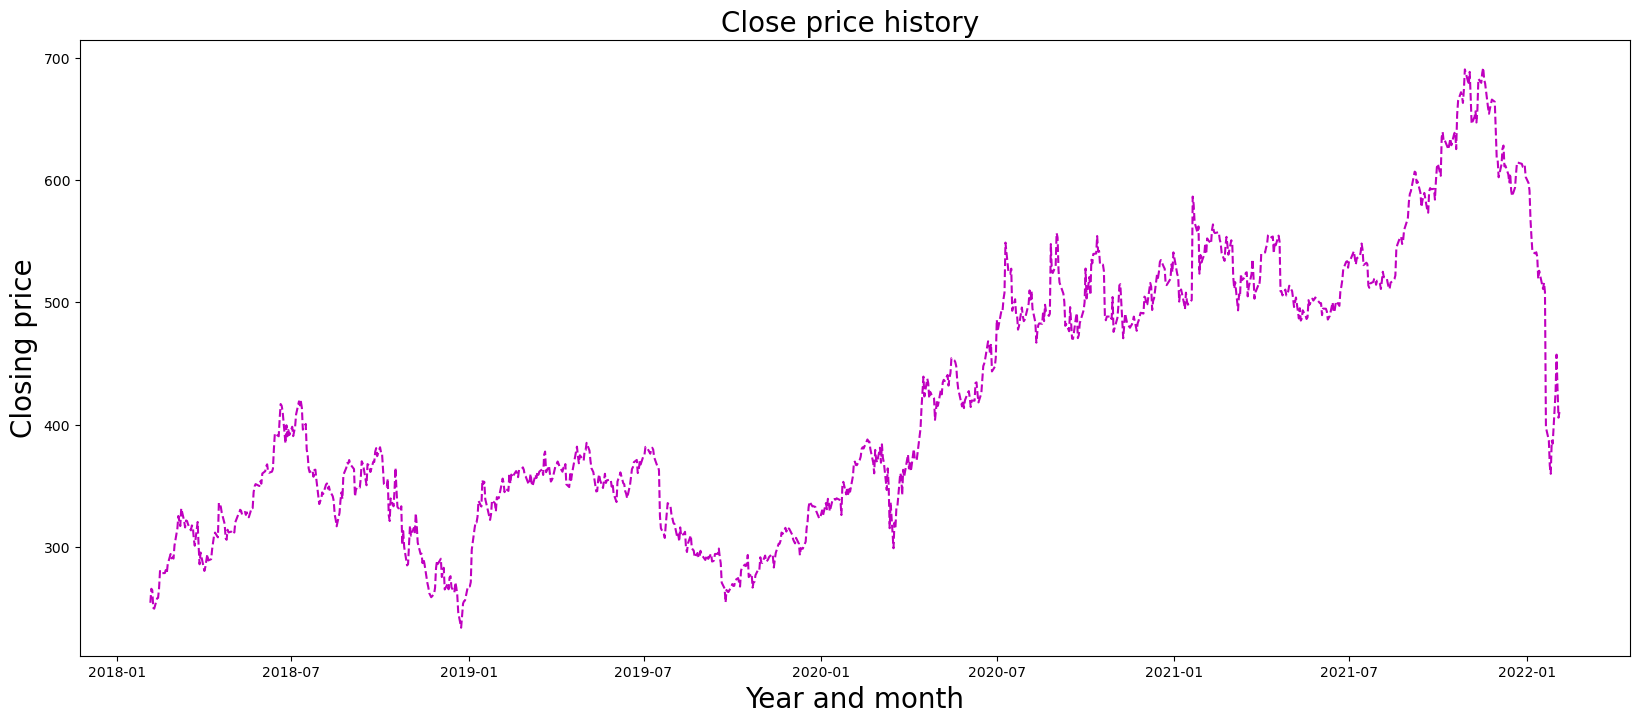

In [5]:
# Visualising the 'close' prices of the data with respect to the date
plt.figure(figsize=(20,8))
plt.plot(stock_data['Date'],stock_data['Adj Close'],color="m", linestyle= 'dashed')
plt.xlabel('Year and month', fontsize=20)
plt.ylabel('Closing price', fontsize=20)
plt.title('Close price history ', fontsize=20)
plt.show()

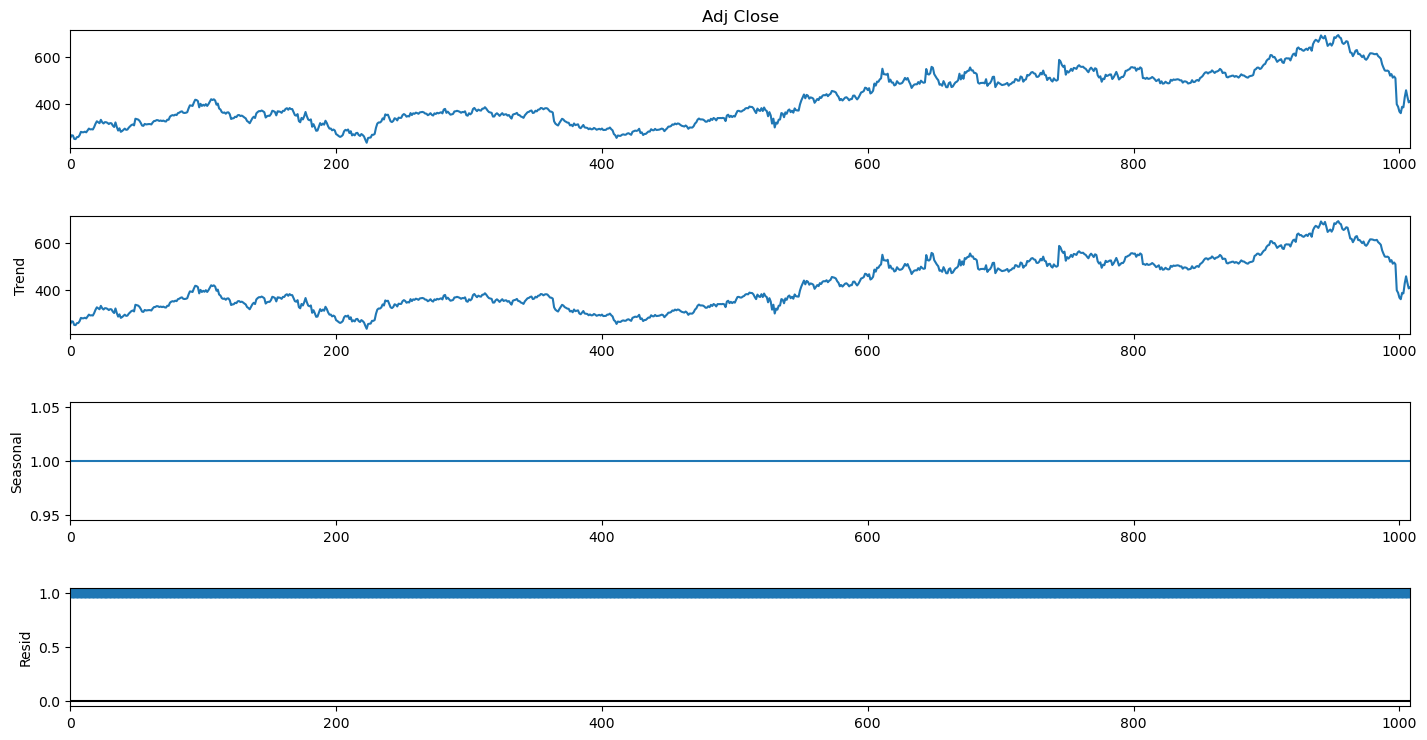

In [7]:
# Seasonal decomposition to find out the component that contributes the most to the time series and it is identified that the trend component has the highest influence on the time series
# The time series pattern has an upward trend and cyclic irregularity components
# There are no seasonal patters identified
decomposition_multiply = sm.tsa.seasonal_decompose(stock_data['Adj Close'], model='multiplicative',period=1)
trend = decomposition_multiply.trend
seasonal = decomposition_multiply.seasonal
residual = decomposition_multiply.resid
fig = decomposition_multiply .plot()
fig.set_size_inches(16, 8)
plt.show()

In [8]:
multiplicative_data = pd.concat([stock_data['Date'],decomposition_multiply.seasonal,decomposition_multiply.trend,decomposition_multiply.resid,decomposition_multiply.observed],axis=1)
multiplicative_data.columns = ['Date','Seasonality','Trend','residual','actual values']
multiplicative_data=multiplicative_data.set_index('Date')
multiplicative_data

,Seasonality,Trend,residual,actual values
Date,,,,
2018-02-05,1.0,254.259995,1.0,254.259995
2018-02-06,1.0,265.720001,1.0,265.720001
2018-02-07,1.0,264.559998,1.0,264.559998
2018-02-08,1.0,250.100006,1.0,250.100006
2018-02-09,1.0,249.470001,1.0,249.470001
...,...,...,...,...
2022-01-31,1.0,427.140015,1.0,427.140015
2022-02-01,1.0,457.130005,1.0,457.130005
2022-02-02,1.0,429.480011,1.0,429.480011


In [9]:
#Computing rolling mean and rolling standard deviation for 12 day window and plotting the same to check for stationarity
def stationarity_check(data,date,title):
    fig, ax = plt.subplots(2,1,figsize=(20, 10))
    rollmean = pd.Series(data).rolling(window=12).mean()
    rollstd = pd.Series(data).rolling(window=12).std()
    ax[0].plot(date,data,color = 'c', label = title)
    ax[0].plot(date,rollmean, color = 'g',label = 'rollmean' )
    ax[0].plot(date,rollstd,color = 'm', label = 'rollstd' )
    ax[0].legend(fontsize=18)
    ax[0].grid()
    #Computing rolling mean and rolling standard deviation for 365 day window and plotting the same to check for stationarity
    rollmean = pd.Series(data).rolling(window=365).mean()
    rollstd = pd.Series(data).rolling(window=365).std()
    ax[1].plot(date,data, color = 'c', label = title)
    ax[1].plot(date,rollmean, color = 'g',label = 'rollmean')
    ax[1].plot(date,rollstd, color = 'm', label = 'rollstd')
    ax[1].legend(fontsize=18)
    ax[1].grid()

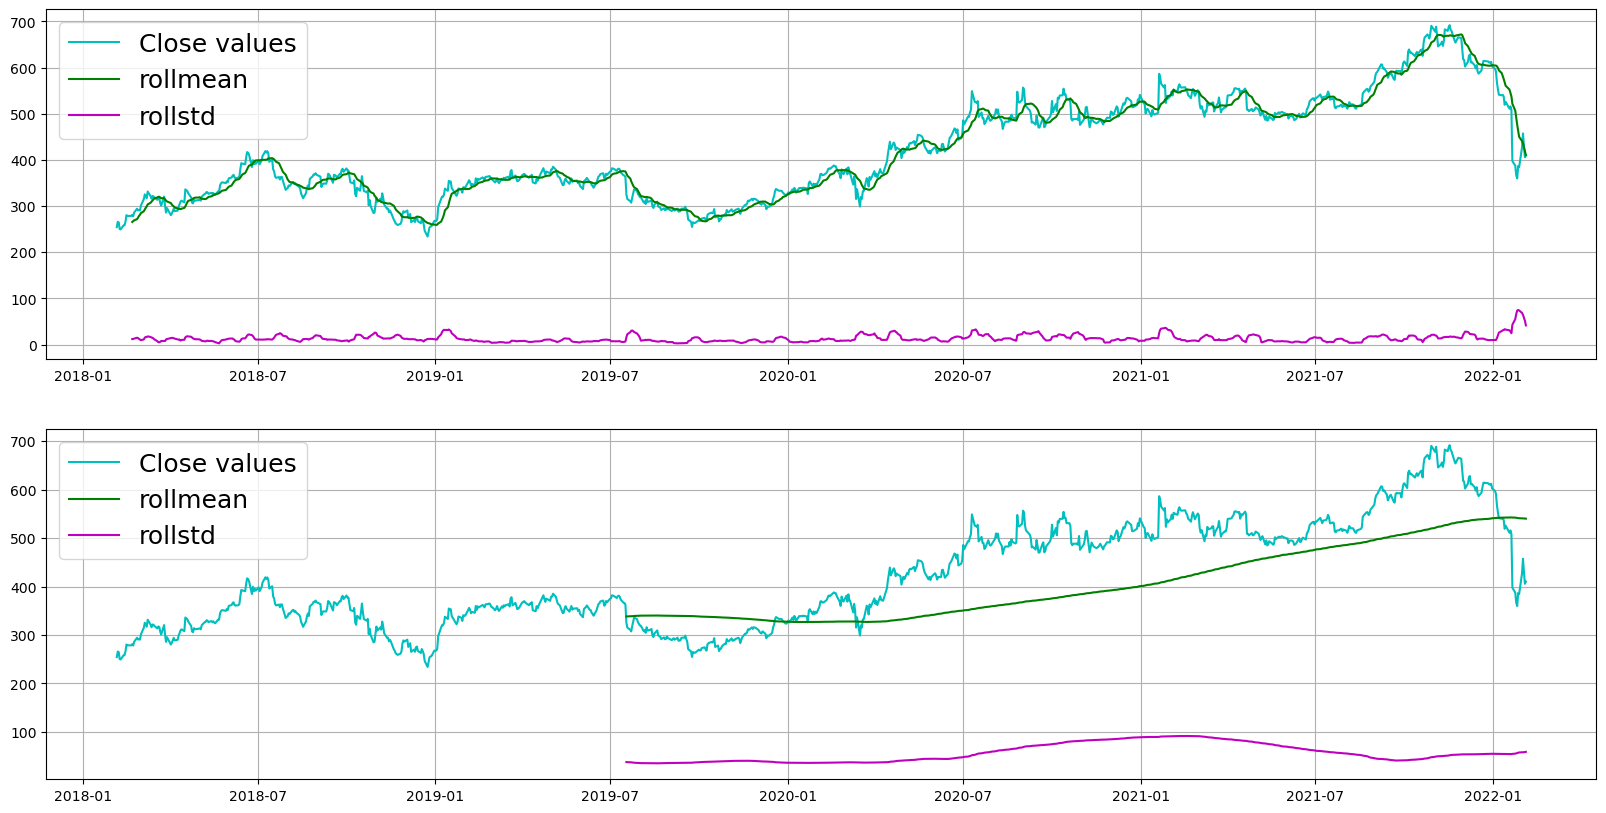

In [10]:
stationarity_check(stock_data['Adj Close'],stock_data['Date'],'Close values')

In [11]:
#Differencing the close prices of the dataset to convert non-stationary time series to a stationary time series
stock_data_lag = stock_data['Adj Close'] - stock_data['Adj Close'].shift(1)
stock_data_lag = pd.DataFrame(stock_data_lag)
stock_data_lag['Date'] = stock_data['Date']
stock_data_lag=stock_data_lag.set_index('Date')
stock_data_lag = stock_data_lag.dropna()
stock_data_lag

,Adj Close
Date,
2018-02-06,11.460006
2018-02-07,-1.160003
2018-02-08,-14.459992
2018-02-09,-0.630005
2018-02-12,8.480011
...,...
2022-01-31,42.780030
2022-02-01,29.989990
2022-02-02,-27.649994


In [12]:
#AdFuller Dickey Test is a statistical hypothesis testing method to check for stationarity.
#Null hypothesis - Unit root is present in time series an it is non stationary
#Alternate hypothesis - Absence of unit root in time series and the series is stationary
def adfuller_test(data):
    stattest = adfuller(data, autolag = 'AIC')
    print(f"ADF-Stataistic : {stattest[0]}")
    print(f"p-value : {stattest[1]}")
    print(f"No of lags used : {stattest[2]}")
    print(f"No of observations : {stattest[3]}")
    critical_values = stattest[4]
    for key,value in critical_values.items():
        print(f"Critical value of {key} : {value}")
# Reject null hypothesis an accept alternate hypothesis if the p-value < 0.05  
#If not accept altenate hypothesis

In [13]:
adfuller_test(stock_data['Adj Close'])
# Since the ADF-test yields a p-value greater than 0.05 
#It is implied that the time series has a unit root and that it is not stationary
# Therefore , we accept the null hypothesis 

ADF-Stataistic : -1.8125906878289948

p-value : 0.3742289256820762

No of lags used : 6

No of observations : 1002

Critical value of 1% : -3.436893045520188

Critical value of 5% : -2.8644287878535146

Critical value of 10% : -2.568308127138936


In [14]:
adfuller_test(stock_data_lag)
# Since the ADF-test yields a p-value less than 0.05  
# It is implied the time series does not have a unit root and that it is stationary
# Therefore , we reject the null hypothesis 

ADF-Stataistic : -14.242275992929095

p-value : 1.5304022754299936e-26

No of lags used : 5

No of observations : 1002

Critical value of 1% : -3.436893045520188

Critical value of 5% : -2.8644287878535146

Critical value of 10% : -2.568308127138936


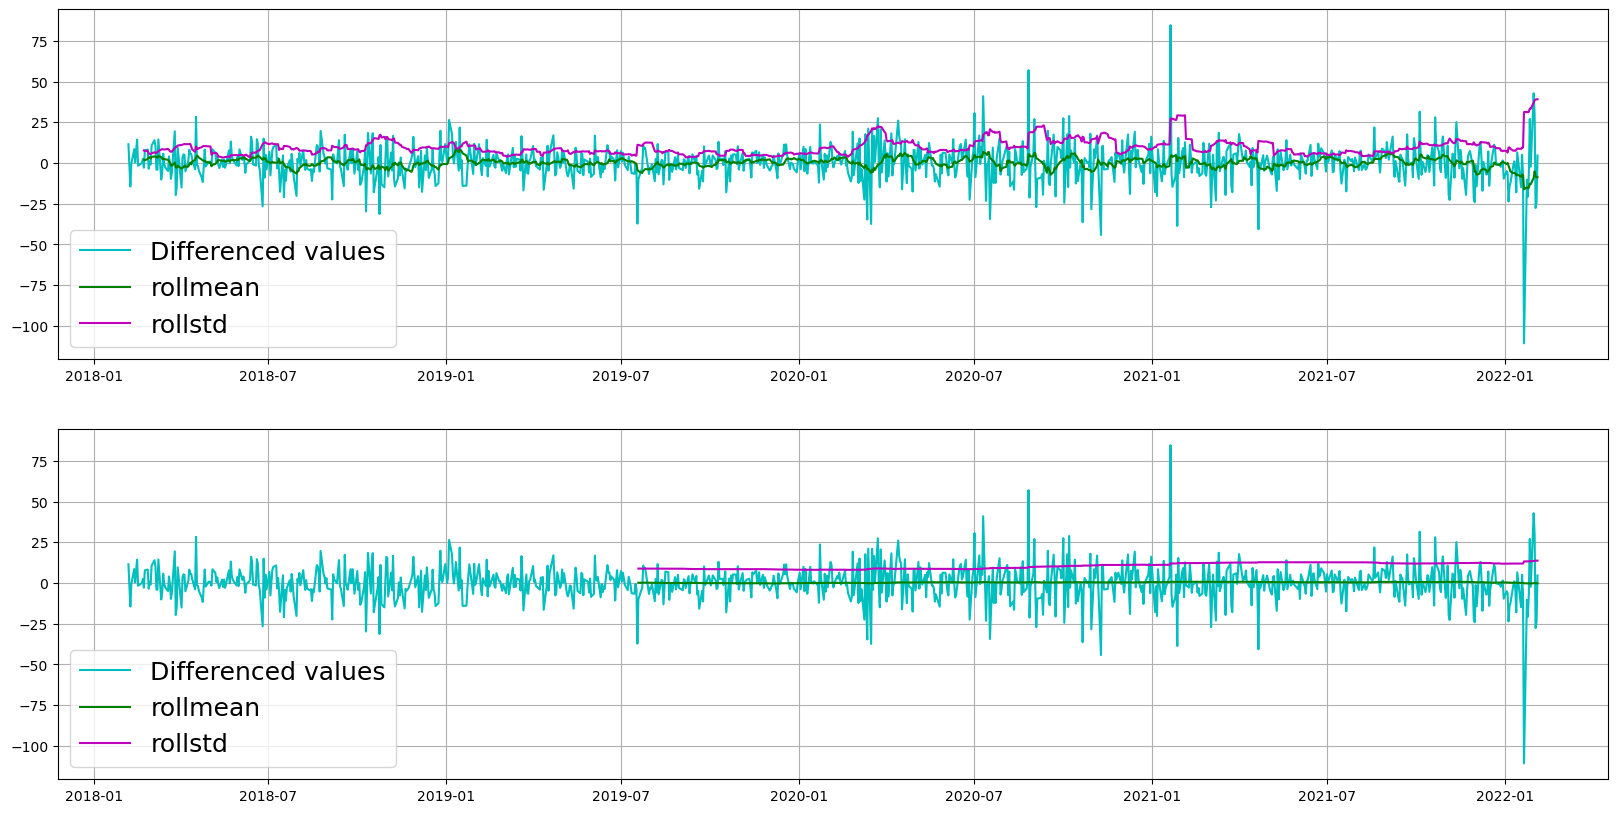

In [15]:
#Computing rolling mean and rolling standard deviation for 12 day window for the differenced data and plotting the same to check for stationarity

fig ,ax = plt.subplots(2,1,figsize=(20, 10))
rollmean = pd.Series(stock_data_lag['Adj Close']).rolling(window=12).mean()
rollstd = pd.Series(stock_data_lag['Adj Close']).rolling(window=12).std()
ax[0].plot(stock_data_lag['Adj Close'],color = 'c', label = 'Differenced values')
ax[0].plot(rollmean, color = 'g',label = 'rollmean' )
ax[0].plot(rollstd,color = 'm', label = 'rollstd' )
ax[0].legend(fontsize=18)
ax[0].grid()
#Computing rolling mean and rolling standard deviation for 365 day window for the differenced data and plotting the same to check for stationarity
rollmean = pd.Series(stock_data_lag['Adj Close']).rolling(window=365).mean()
rollstd = pd.Series(stock_data_lag['Adj Close']).rolling(window=365).std()
ax[1].plot(stock_data_lag['Adj Close'],color = 'c', label = 'Differenced values')
ax[1].plot(rollmean, color = 'g',label = 'rollmean' )
ax[1].plot(rollstd,color = 'm', label = 'rollstd' )
ax[1].legend(fontsize=18)
ax[1].grid()

In [16]:
# Visualising the autocorrelation and partial auto correlation plots to identify the the p an q parameters in the ARIMA moddel.
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

C:\Users\Fouzia\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.

  warnings.warn(


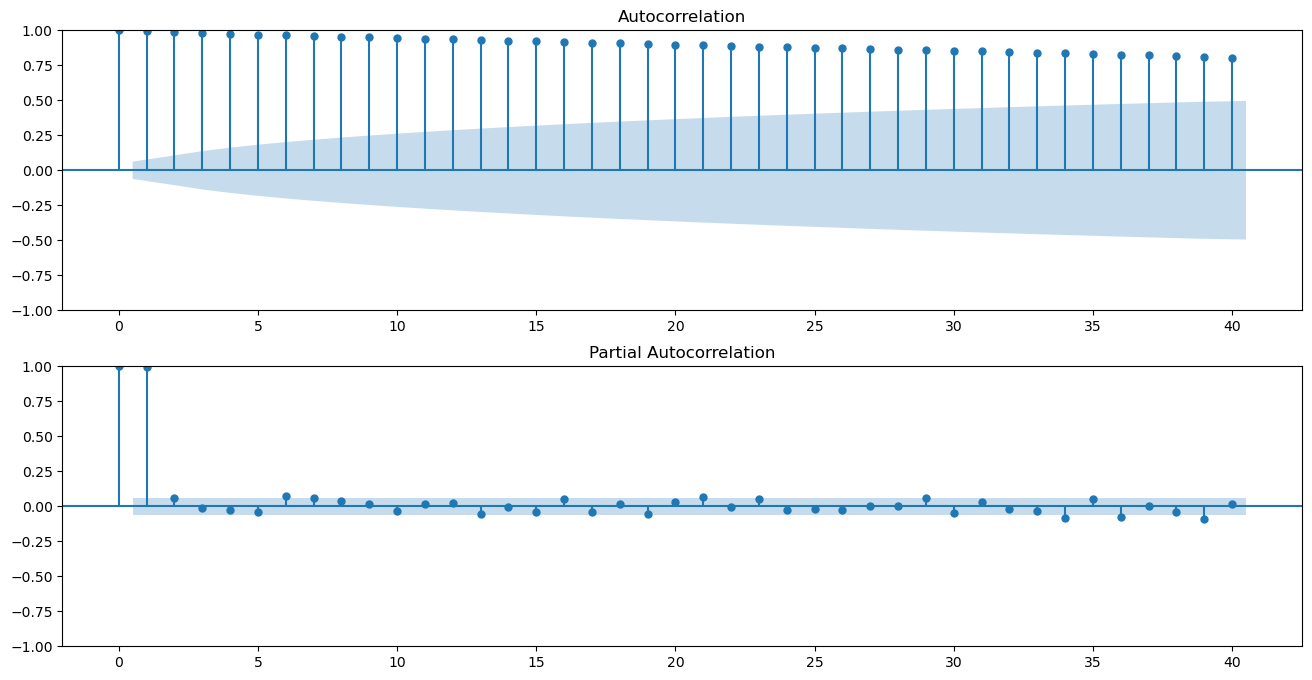

In [17]:
fig= plt.figure(figsize=(16,8))
ax1= fig.add_subplot(211)
fig=sm.graphics.tsa.plot_acf(stock_data['Adj Close'],lags=40,ax=ax1)
ax2= fig.add_subplot(212)
fig=sm.graphics.tsa.plot_pacf(stock_data['Adj Close'],lags=40,ax=ax2)

In [18]:
#To identify the p - parameter in ARIMA(p,d,q)
# The blue area is reffered to as the confidence threshold and spikes above the blue area reveals significant correlations
# Tail off is exponential decay to zero
# Cut off is abrupt decay to zero
# Tail off is observed in ACF plot an cut off in PACF plot at 3rd lag
# Therefore it is an AR(3) model

#To identify the q - parameter in ARIMA(p,d,q)
# The blue area is reffered to as the confidence threshold and spikes above the blue area reveals significant correlations
# Tail off is exponential decay to zero
# Cut off is abrupt decay to zero
# Tail off is observed in PACF plot an cut off in ACF plot at 2nd lag
# Therefore it is an MA(2) model

#To identify the d - parameter in ARIMA(p,d,q)
#Since the dataset in differenced once to make the time series stationary , AR(d=1) 

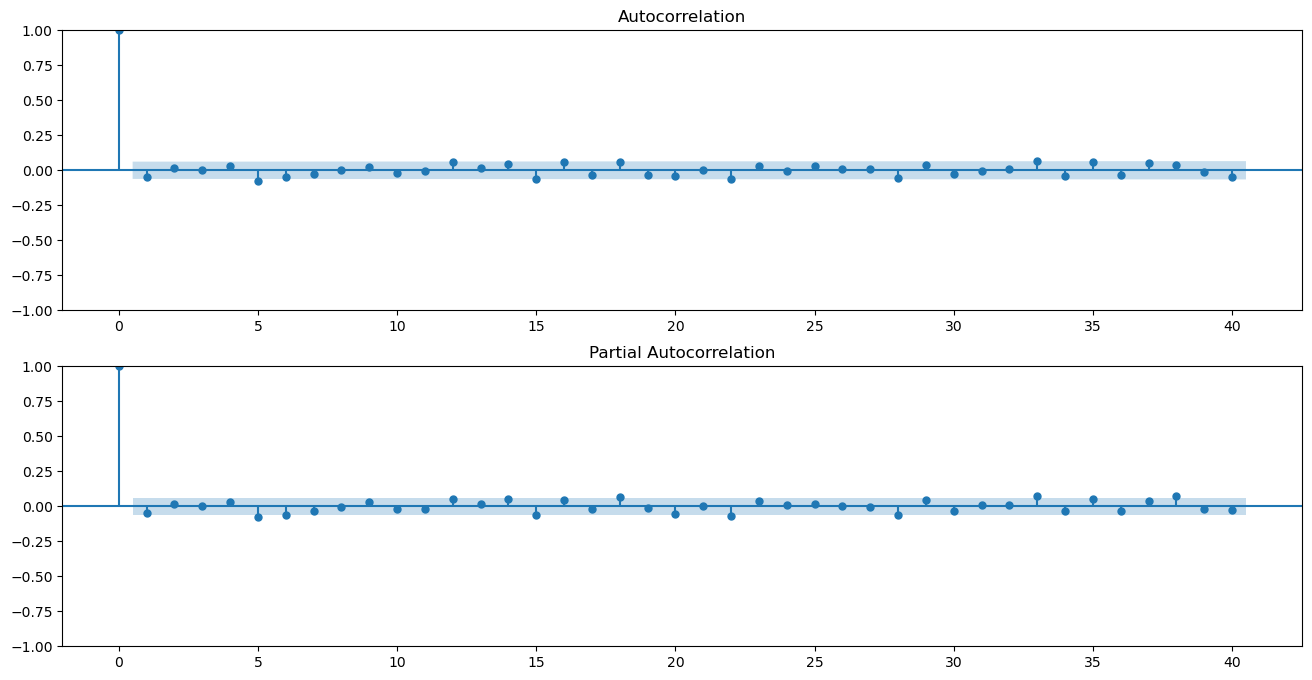

In [19]:
fig= plt.figure(figsize=(16,8))
ax1= fig.add_subplot(211)
fig=sm.graphics.tsa.plot_acf(stock_data_lag,lags=40,ax=ax1)
ax2= fig.add_subplot(212)
fig=sm.graphics.tsa.plot_pacf(stock_data_lag,lags=40,ax=ax2)

In [20]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings('ignore')

In [21]:
#Train-Test Split
#Splitting the 'Adj Close' column values into train and test datasets
# Allocating 70% of data to the train and remaining to the test
training_data_num = len(stock_data['Adj Close']) * 0.8
training_data_num

807.2

In [22]:
import math
training_data_num=math.ceil(training_data_num)
print(training_data_num)

808


In [23]:
training_data = pd.DataFrame(stock_data['Adj Close'].iloc[0:808])
training_data['Date']=stock_data['Date'][0:808]
training_data=training_data.set_index('Date')
training_data

,Adj Close
Date,
2018-02-05,254.259995
2018-02-06,265.720001
2018-02-07,264.559998
2018-02-08,250.100006
2018-02-09,249.470001
...,...
2021-04-15,549.219971
2021-04-16,546.539978
2021-04-19,554.440002


In [26]:
testing_data = stock_data['Adj Close'][training_data_num:]
testing_data = pd.DataFrame(testing_data)
testing_data['Date'] = stock_data['Date'].iloc[808:]
testing_data=testing_data.set_index('Date')
testing_data

,Adj Close
Date,
2021-04-22,508.779999
2021-04-23,505.549988
2021-04-26,510.299988
2021-04-27,505.549988
2021-04-28,506.519989
...,...
2022-01-31,427.140015
2022-02-01,457.130005
2022-02-02,429.480011


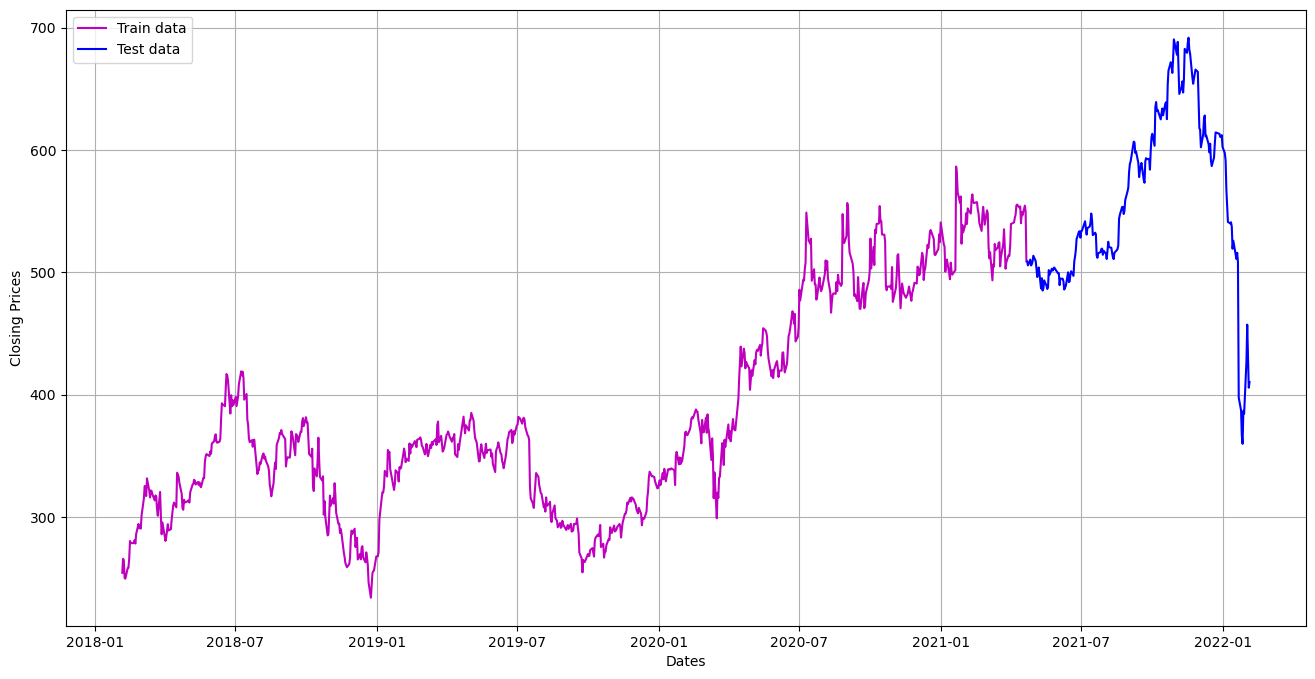

In [27]:
plt.figure(figsize=(16,8))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(training_data, 'm', label='Train data')
plt.plot(testing_data, 'b', label='Test data')
plt.legend()

Performing stepwise search to minimize aic

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6100.453, Time=0.09 sec

 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6090.727, Time=0.23 sec

 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=6091.041, Time=0.40 sec

 ARIMA(0,1,0)(0,0,0)[0]             : AIC=6099.171, Time=0.08 sec

 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=6092.653, Time=0.31 sec

 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=6090.567, Time=0.57 sec

 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=6090.746, Time=1.00 sec

 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=6090.512, Time=0.91 sec

 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=6092.794, Time=0.44 sec

 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=6088.748, Time=1.06 sec

 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=6081.326, Time=1.98 sec

 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=6091.184, Time=0.96 sec

 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=6085.536, Time=2.73 sec

 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=6090.386, Time=1.62 sec

 ARIMA(3,1,2)(0,0,

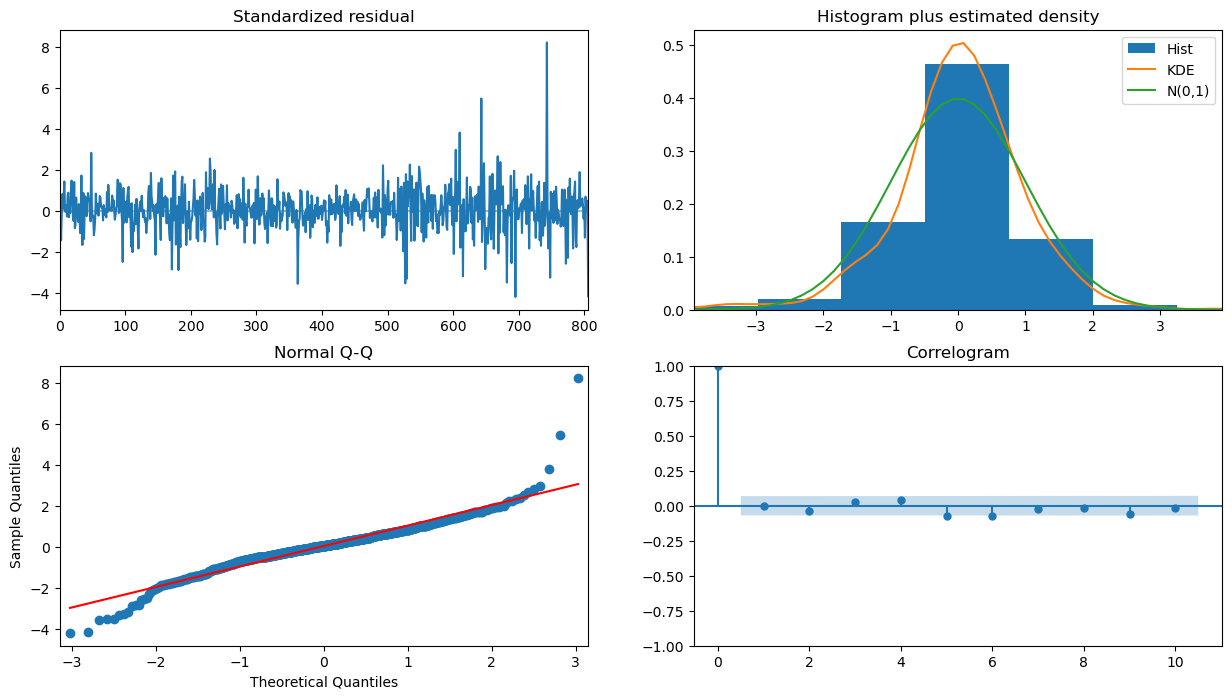

In [28]:
# Pmd auto-arima is an ARIMA model package that yields the best ARIMA model parameters (p,d,q)
model_autoARIMA = auto_arima(training_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [29]:
# Builing the ARIMA model for the time series data
model = ARIMA(training_data,order=(3,1,2))
fitted = model.fit()
fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Adj Close   No. Observations:                  808
Model:                 ARIMA(3, 1, 2)   Log Likelihood               -3034.106
Date:                Sat, 25 Feb 2023   AIC                           6080.211
Time:                        13:40:40   BIC                           6108.371
Sample:                             0   HQIC                          6091.024
                                - 808                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.7813      0.045    -39.802      0.000      -1.869      -1.694
ar.L2         -1.0629      0.075    -14.088      0.000      -1.211      -0.915
ar.L3         -0.0793      0.039     -2.009      0.044      -0.157      -0.002
ma.L1          1.6867      0.030     56.453      0.000       1.628       1.745
ma.L2          0.9381      0.029     32.788      0.000       0.882       0.994
sigma2       107.8897      2.464     43.794      0.000     103.061     112.718
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):              2063.45
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               2.05   Skew:                             0.41
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [30]:
# Forecasting the stock prices for the following 201 days in the test dataset
step=201
forecast= fitted.forecast(step,alpha=0.05)


In [31]:
fc = pd.DataFrame(forecast)
fc['Date'] = stock_data['Date'].iloc[808:]
fc=fc.set_index('Date')
fc['Test_data'] = testing_data
fc

,predicted_mean,Test_data
Date,,
2021-04-22,511.330522,508.779999
2021-04-23,509.923810,505.549988
2021-04-26,513.071530,510.299988
2021-04-27,508.766897,505.549988
2021-04-28,513.200580,506.519989
...,...,...
2022-01-31,511.086727,427.140015
2022-02-01,511.086053,457.130005
2022-02-02,511.086930,429.480011


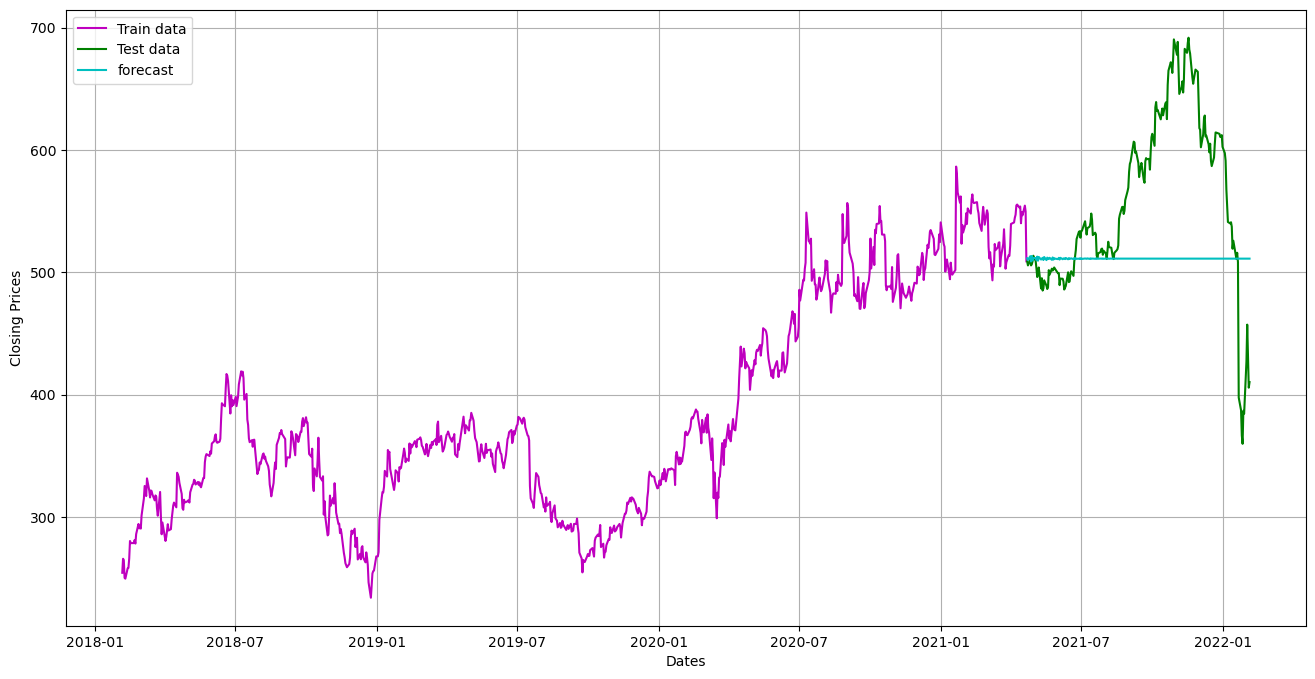

In [32]:
# Visualizing the performance of ARIMA model 
plt.figure(figsize=(16,8))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(training_data, 'm', label='Train data')
plt.plot(fc['Test_data'], 'g', label='Test data')
plt.plot(fc['predicted_mean'], 'c', label='forecast')
plt.legend()

In [33]:
#Performance metrics to evaluate the model
mse = mean_squared_error(fc['Test_data'], fc['predicted_mean'])
print('MSE: '+str(mse))
mae = mean_absolute_error(fc['Test_data'], fc['predicted_mean'])
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(fc['Test_data'],fc['predicted_mean'] ))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc['predicted_mean'] - fc['Test_data'])/np.abs(fc['Test_data']))
print('MAPE: '+str(mape))

MSE: 7156.94317588326

MAE: 64.51149917808925

RMSE: 84.59871852388345

MAPE: 0.1104031666104582


In [34]:
accuracy_score = 100 - (mape*100)
print(f"The accuracy_score for the time series analysis using ARIMA model is : {accuracy_score}")
# The mean absolute percentage error is too high (greater than 0.05) 
# 11.0% which yiels an high accuracy score of  88.9596%
# It is evident that the ARIMA model hasn't performed well with the stock price dataset 
# It is not advisable to use this moel to  predict the future values with utmost accuracy. 

The accuracy_score for the time series analysis using ARIMA model is : 88.95968333895418
